In [18]:
#Add Matplotlib inline magic command
%matplotlib inline

#add dependencies
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
#files to load

city_data_to_load = "C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Resources\\city_data.csv"
ride_data_to_load = "C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Resources\\ride_data.csv"


In [20]:
#read the city file and store it as a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [21]:
#read the ride file and store it as a pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000
4,South Jack,3/6/2019 4:28,34.58,3908450000000
5,South Latoya,3/11/2019 12:26,9.52,1995000000000
6,New Paulville,2/27/2019 11:17,43.25,793208000000
7,Simpsonburgh,4/26/2019 0:43,35.98,111954000000
8,South Karenland,1/8/2019 3:28,35.09,7995620000000
9,North Jasmine,3/9/2019 6:26,42.81,5327640000000


In [22]:
#get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [23]:
#get columns and rows that are not all
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [24]:
#get data types for columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [25]:
#get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [26]:
#get the number of data points for Urban cities
sum(city_data_df["type"]=="Urban")

66

In [27]:
#get the number of data points for suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [28]:
#get the number of data points for rural cities
sum(city_data_df["type"]=="Rural")

18

In [29]:
#get the columns and rows that are not null for ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [30]:
#check to make sure there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [35]:
#get the data types for columns in ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [33]:
#merge city and ride dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left",on=["city", "city"])

#display the new dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [36]:
#create the urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [37]:
#create the suburban city dataframe and rural city dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [38]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076080000000,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985260000000,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421840000000,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269650000000,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018030000000,2,Rural


In [39]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [40]:
#get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [41]:
#get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [42]:
#get the average fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [43]:
#get the average fare for each city in suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [45]:
#get the average fare for each city in rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [46]:
#get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [48]:
#get the average number of drivers for each rural and suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


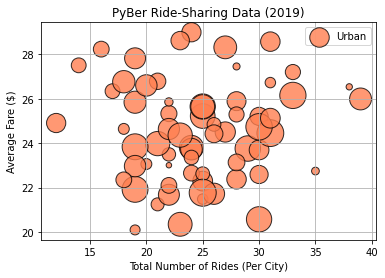

In [52]:
#build scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add the legend
plt.legend()

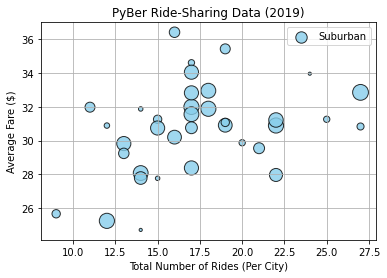

In [56]:
#build scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add the legend
plt.legend()

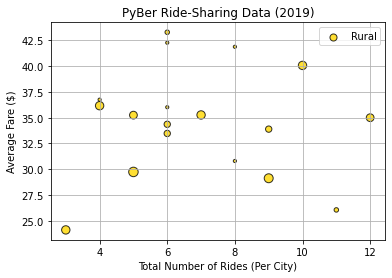

In [57]:
#build scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add the legend
plt.legend()

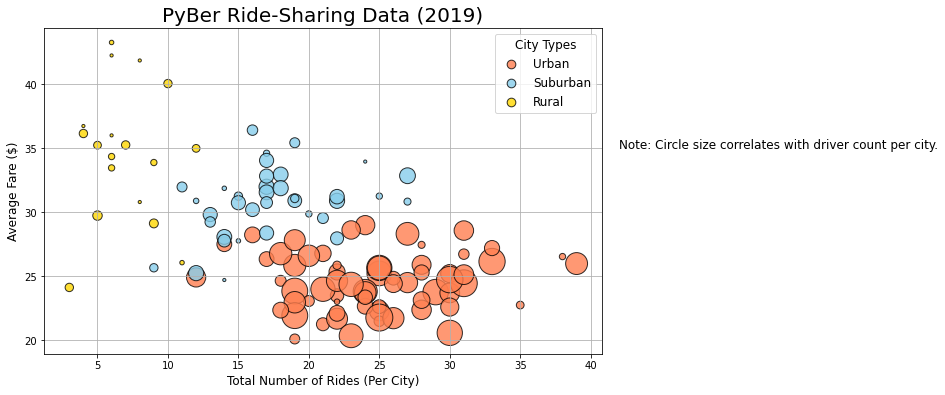

In [61]:
plt.subplots(figsize=(10,6))

#build scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

#build scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

#build scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

#incorporatethe other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#create legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circle size 
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#show the plot
#plt.show()

#save the figure
plt.savefig("C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Analysis\\Fig1.png")


In [62]:
#get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [66]:
#get summary statistics for suburban 
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [67]:
#get summary statistics for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [68]:
#get summary statistics for urban rides
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [69]:
#get summary statistics for suburban rides
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [70]:
#get summary statistics for rural rides
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [71]:
#calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [72]:
#get the median number of rides
round(urban_ride_count.median(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.0, 17.36, 6.94)

In [73]:
#calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [74]:
suburban_ride_count.mode()

0    17
dtype: int64

In [75]:
#import NumPy and stats module from SciPy
import numpy as np
import scipy.stats as sts

In [80]:
#calculate the measures of central tendency for ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")




The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [85]:
#get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [87]:
#calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [89]:
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean suburban fares is ${mean_suburban_fares:.2f}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean rural fare is ${mean_rural_fares:.2f}.")



The mean suburban fares is $30.97.
The mean rural fare is $34.62.


In [91]:
#get the driver count from the urban cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [93]:
#get measures of central tendency for urban, suburban, and rural drivers

#urban statistics
mean_urban_drivers = round(np.mean(urban_drivers))
median_urban_drivers = round(np.median(urban_drivers))
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mean for drivers for urban trips is {mean_urban_drivers}.")
print(f"The median for drivers for urban trips is {median_urban_drivers}.")
print(f"The mode for drivers for urban trips is {mode_urban_drivers}.")

#suburban statistics
mean_suburban_drivers = round(np.mean(suburban_drivers))
median_suburban_drivers = round(np.median(suburban_drivers))
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mean for drivers for suburban trips is {mean_suburban_drivers}.")
print(f"The median for drivers for suburban trips is {median_suburban_drivers}.")
print(f"The mode for drivers for suburban trips is {mode_suburban_drivers}.")

#rural statistics
mean_rural_drivers = round(np.mean(rural_drivers))
median_rural_drivers = round(np.median(rural_drivers))
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mean for drivers for rural trips is {mean_rural_drivers}.")
print(f"The median for drivers for rural trips is {median_rural_drivers}.")
print(f"The mode for drivers for rural trips is {mode_rural_drivers}.")



The mean for drivers for urban trips is 37.
The median for drivers for urban trips is 37.
The mode for drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean for drivers for suburban trips is 14.
The median for drivers for suburban trips is 16.
The mode for drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean for drivers for rural trips is 4.
The median for drivers for rural trips is 4.
The mode for drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


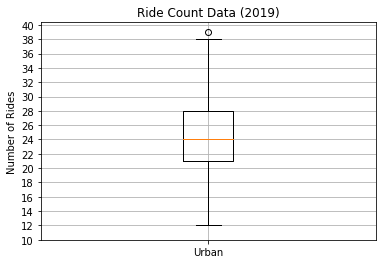

In [94]:
#create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

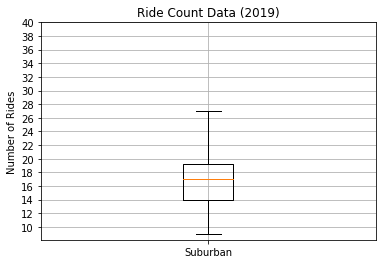

In [95]:
#create a box-and-whisker plot for suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

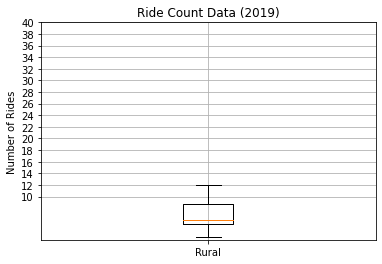

In [97]:
#create a box-and-whisker plot for rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

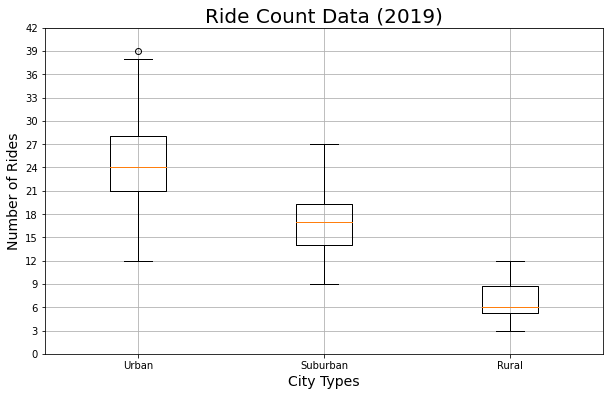

In [98]:
#Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#Save the figure
plt.savefig("C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Analysis\\Fig2.png")

plt.show()

In [99]:
#get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")



West Angela has the highest rider count.


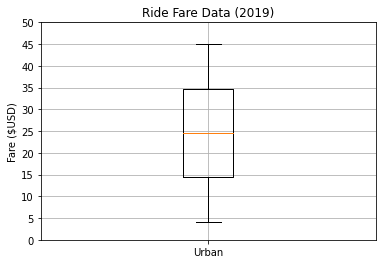

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [101]:
#create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#add title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

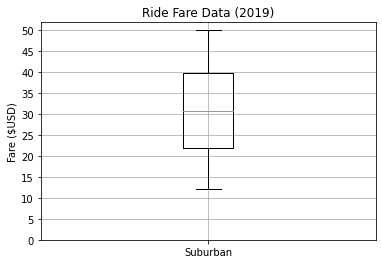

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [102]:
#create box-and-whisker plots for suburban_fares
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#add title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

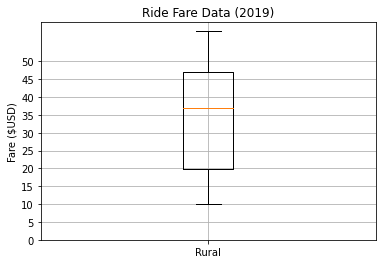

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [103]:
#create box-and-whisker plot for rural fares
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#add title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

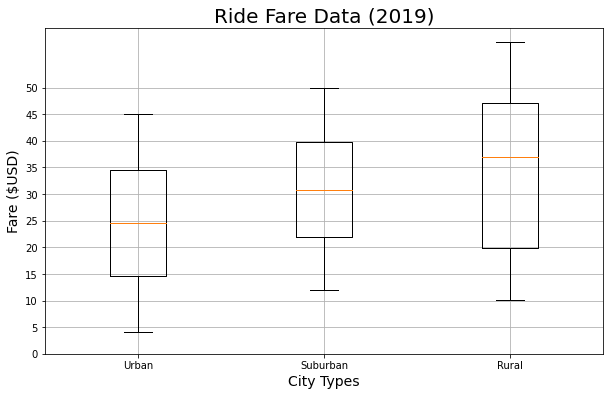

In [104]:
#Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
#Save the figure
plt.savefig("C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Analysis\\Fig3.png")

plt.show()

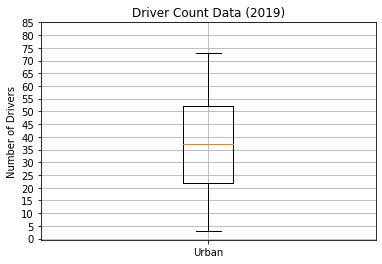

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [106]:
#Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#add the title, y-axis, grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


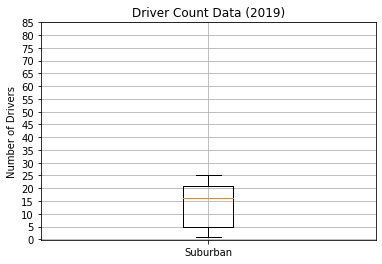

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [108]:
#create box-and-whisker plot for suburban drivers
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#add the title, y-axis, grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

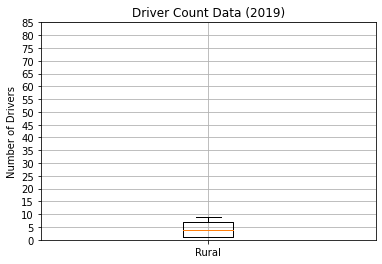

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [109]:
#create box-and-whisker plot for rural drivers
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#add the title, y-axis, grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

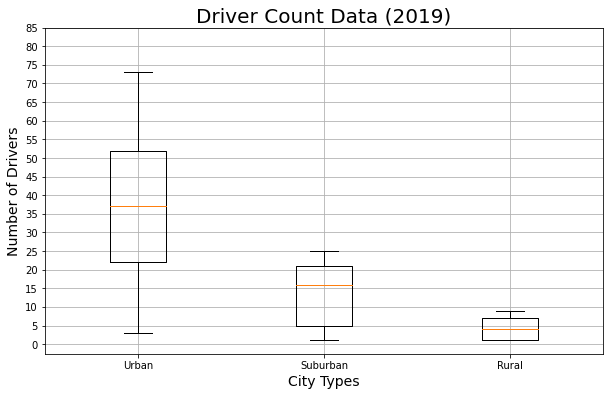

In [112]:
#Add all driver box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

#save the figure
plt.savefig("C:\\Users\\purvi\\OneDrive\\Desktop\\Bootcamp Projects\\PyBer_Analysis\\Analysis\\Fig4.png")

plt.show()

In [113]:
#get the sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [114]:
#get sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [116]:
#calculate the percentage of fare for each city type
type_percents = sum_fares_by_type/total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [119]:
#can be entered as a single line of code
type_percents = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum() * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

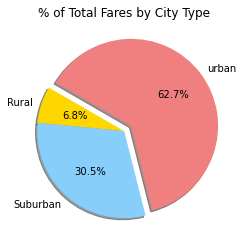

In [122]:
#import mpl to change the plot configurations using rcParams
import matplotlib as mpl

#build the percentage of fares by city type pie chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#change the default font size from 10 to 14
mpl.rcParams["font.size"] = 14
#show
plt.show()